In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Customers_in_a_Shop.csv', header=None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       144 non-null    object 
 1   1       140 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [3]:
data.head()

,0,1
0,1949-01,114.0
1,1949-02,120.0
2,1949-03,134.0
3,1949-04,67.0
4,1949-05,123.0


In [4]:
data.columns = ['Date','Customers']
data['Date'] = pd.to_datetime(data['Date'],format="%Y-%m")
data = data.set_index('Date') # convert data into row index


In [5]:
data.head()

,Customers
Date,
1949-01-01,114.0
1949-02-01,120.0
1949-03-01,134.0
1949-04-01,67.0
1949-05-01,123.0


In [6]:
data.isnull().sum()

Customers    4
dtype: int64

In [7]:
[index for index, row in data.iterrows() if row.isnull().any()]

[Timestamp('1951-06-01 00:00:00'),
 Timestamp('1951-07-01 00:00:00'),
 Timestamp('1954-06-01 00:00:00'),
 Timestamp('1960-03-01 00:00:00')]

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

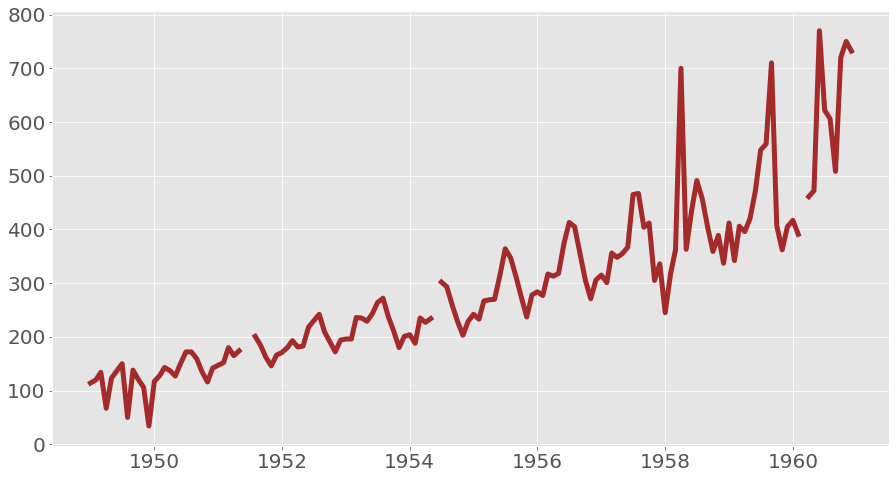

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=[15,8])
plt.plot(data, color= 'brown', linewidth=5)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20);

### dealing missing values

In [10]:
# ffill
data['Customers'].ffill(inplace= True)

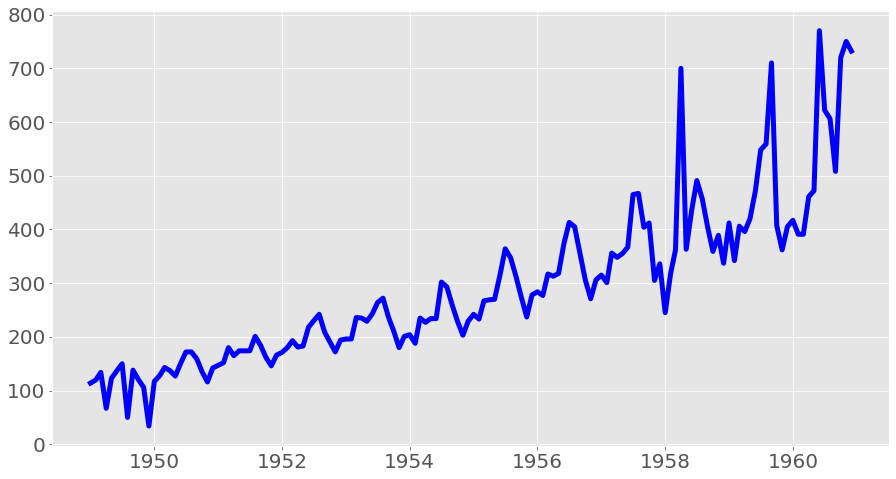

In [11]:
plt.figure(figsize=[15,8])
plt.plot(data, color= 'blue', linewidth=5)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20);

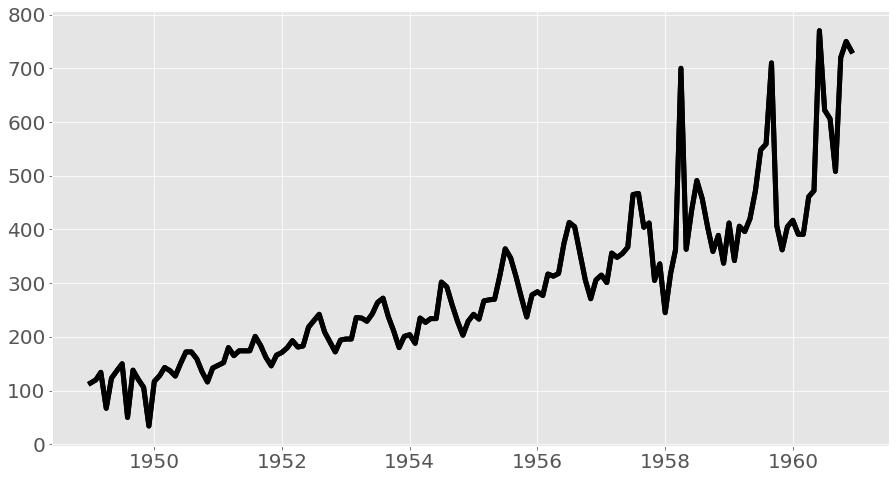

In [12]:
# linear interpolation        
data['Customers_linear']=data['Customers'].interpolate(method='linear')
plt.figure(figsize=[15,8])
plt.plot(data, color= 'black', linewidth=5)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20);

In [13]:
data.head()

,Customers,Customers_linear
Date,,
1949-01-01,114.0,114.0
1949-02-01,120.0,120.0
1949-03-01,134.0,134.0
1949-04-01,67.0,67.0
1949-05-01,123.0,123.0


In [14]:
# padding
# data['Customers'].interpolate(method='pad',limit=4)


In [15]:
data.head(10)

,Customers,Customers_linear
Date,,
1949-01-01,114.0,114.0
1949-02-01,120.0,120.0
1949-03-01,134.0,134.0
1949-04-01,67.0,67.0
1949-05-01,123.0,123.0
1949-06-01,137.0,137.0
1949-07-01,150.0,150.0
1949-08-01,50.0,50.0
1949-09-01,138.0,138.0


### outlier

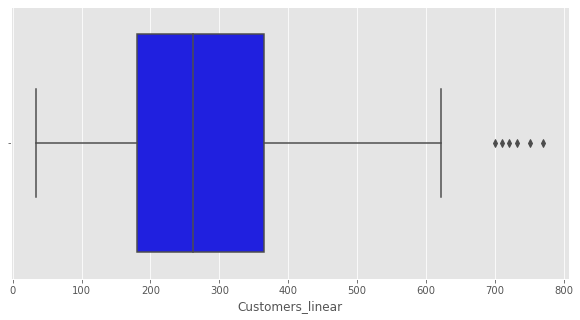

In [16]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
plt.subplots(figsize=(10, 5))
sns.boxplot(data['Customers_linear'], color='blue');


In [17]:
data['Customers_linear'].sort_values(ascending= False).head(7)

Date
1960-06-01    770.0
1960-11-01    750.0
1960-12-01    732.0
1960-10-01    720.0
1959-09-01    710.0
1958-04-01    700.0
1960-07-01    622.0
Name: Customers_linear, dtype: float64

In [18]:

data['Customers_linear'].loc[(data['Customers_linear']>=700)] = 622

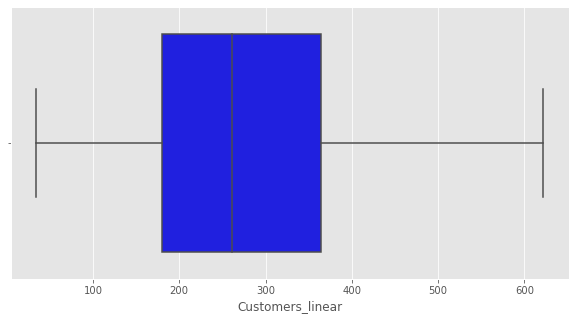

In [19]:
plt.subplots(figsize=(10, 5))
sns.boxplot(data['Customers_linear'], color='blue');

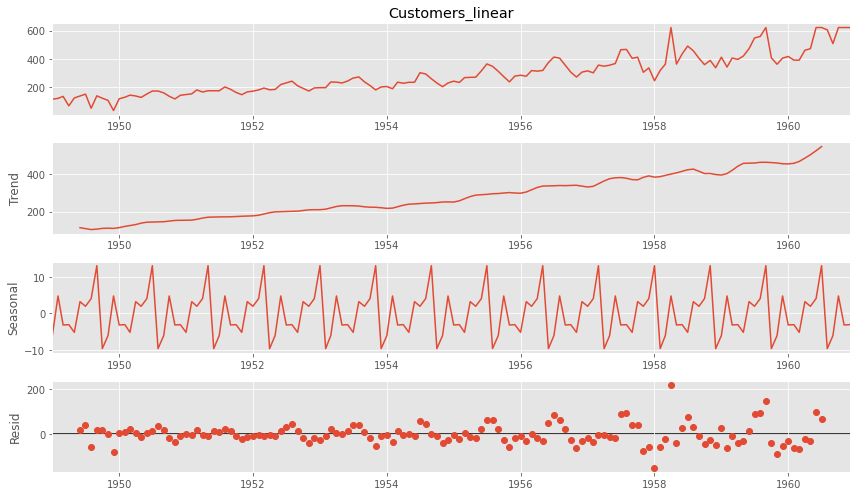

In [20]:
# Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
res=seasonal_decompose(data['Customers_linear'], period=10)
fig=res.plot()

fig.set_size_inches((12, 7))
# Tight layout to realign things
fig.tight_layout()
plt.show()

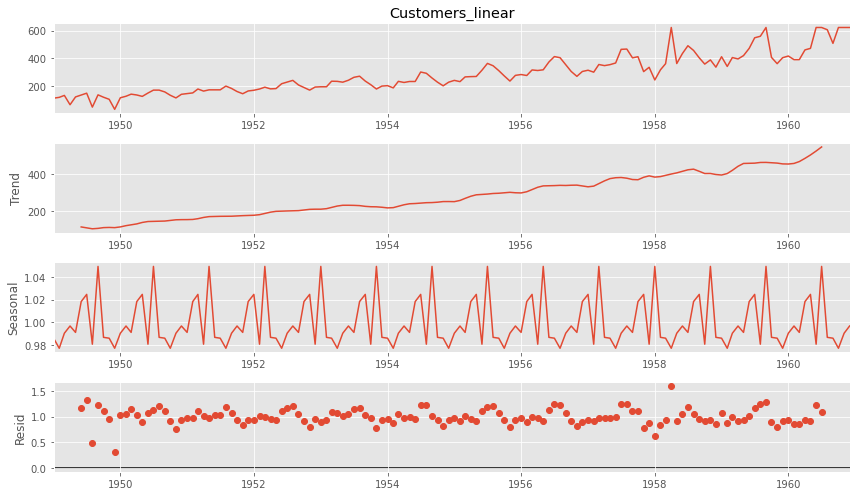

In [21]:
res=seasonal_decompose(data['Customers_linear'],model='multiplicative', period=10)
fig=res.plot()

fig.set_size_inches((12, 7))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [22]:
data.shape

(144, 2)

In [23]:
length=115
train=data.iloc[:length,:]
test=data.iloc[length:,:]

In [24]:
train.shape

(115, 2)

### Naive method

In [25]:
y_naive = test.copy()
y_naive['forecasted_naive'] = train['Customers'][length-1] 



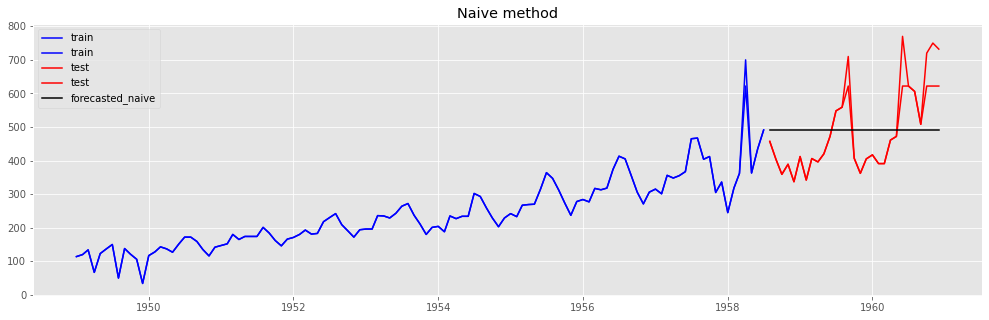

In [26]:
plt.figure(figsize=[17,5])
plt.plot(train, color='blue', label='train')
plt.plot(test, color='red',  label='test')
plt.plot(y_naive['forecasted_naive'], color='black', label='forecasted_naive')
plt.legend()
plt.title('Naive method')
plt.show()

### Simple moving average

In [27]:
y_ave= test.copy()
y_ave['forcasting_average']=data['Customers_linear'].mean()


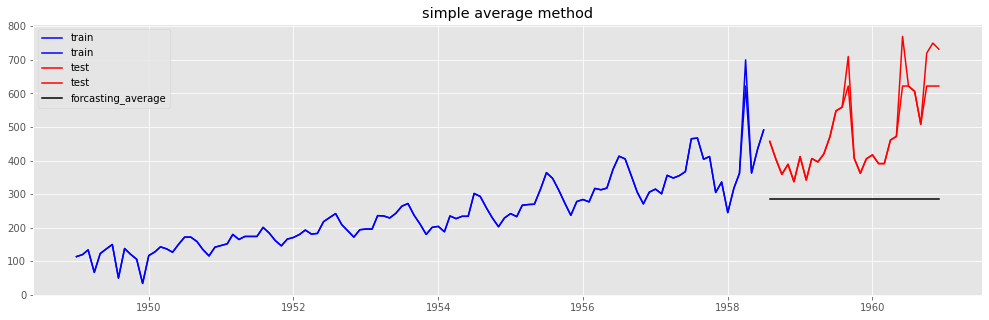

In [28]:
plt.figure(figsize=[17,5])
plt.plot(train, color='blue', label='train')
plt.plot(test, color='red',  label='test')
plt.plot(y_ave['forcasting_average'], color='black', label='forcasting_average')
plt.legend()
plt.title('simple average method')
plt.show()

In [29]:
ave_copy= data.copy()
window=9
ave_copy['moving_ave']=ave_copy['Customers_linear'].rolling(window).mean()
ave_copy['moving_ave'][length:]=ave_copy['moving_ave'][length-1]

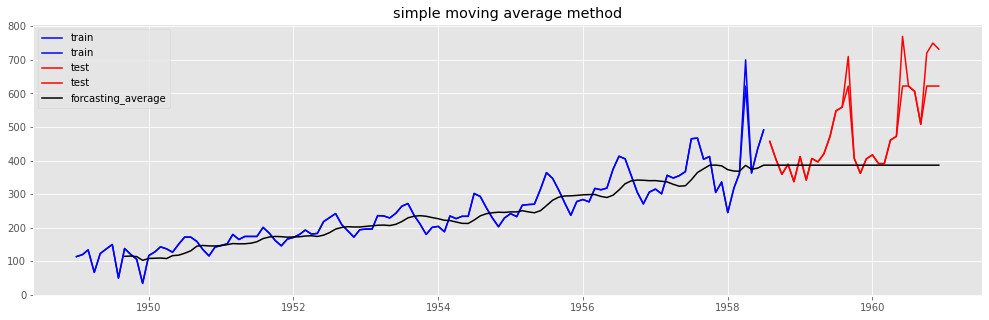

In [30]:
plt.figure(figsize=[17,5])
plt.plot(train, color='blue', label='train')
plt.plot(test, color='red',  label='test')
plt.plot(ave_copy['moving_ave'], color='black', label='forcasting_average')
plt.legend()
plt.title('simple moving average method')
plt.show()

### SimpleExpSmoothing

In [31]:
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model=SimpleExpSmoothing(train['Customers_linear'])
midel_fit=model.fit(smoothing_level=0.2)
midel_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 115.25658720435136,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [32]:
y_ex=test.copy()
y_ex['forcasting']=midel_fit.forecast(24)

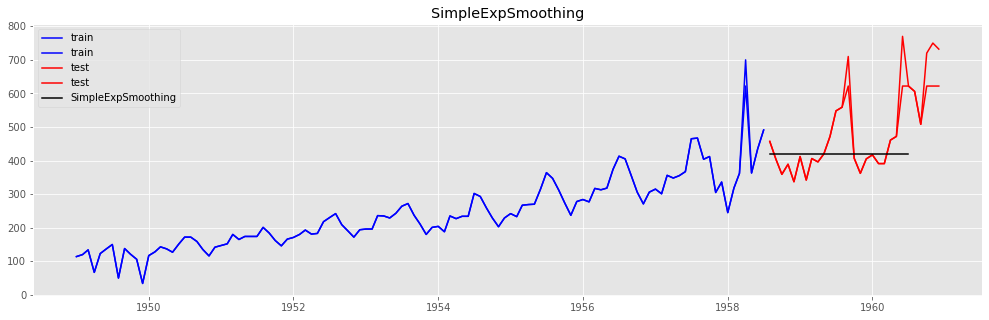

In [33]:
plt.figure(figsize=[17,5])
plt.plot(train, color='blue', label='train')
plt.plot(test, color='red',  label='test')
plt.plot(y_ex['forcasting'], color='black', label='SimpleExpSmoothing')
plt.legend()
plt.title('SimpleExpSmoothing')
plt.show()

### holt Exponetial Smoothing

In [34]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model2=ExponentialSmoothing(train['Customers_linear'],trend='mul', seasonal_periods=10)
model2_fit=model2.fit(smoothing_level=0.2, smoothing_slope=0.04)
model2_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': 0.04,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 114.0,
 'initial_trend': 1.0526315789473684,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

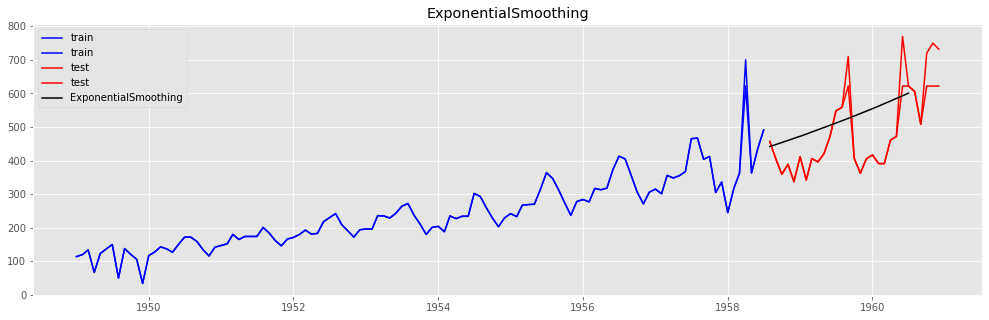

In [35]:
new_s=test.copy()
new_s['forcast']=model2_fit.forecast(24)
plt.figure(figsize=[17,5])
plt.plot(train, color='blue', label='train')
plt.plot(test, color='red',  label='test')
plt.plot(new_s['forcast'], color='black', label='ExponentialSmoothing')
plt.legend()
plt.title('ExponentialSmoothing')
plt.show()

In [36]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model3=ExponentialSmoothing(train['Customers_linear'],trend='additive', seasonal_periods=10)
model3_fit=model3.fit(smoothing_level=0.2, smoothing_slope=0.04)
model3_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': 0.04,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 103.54400019930873,
 'initial_trend': 2.0281532865187453,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

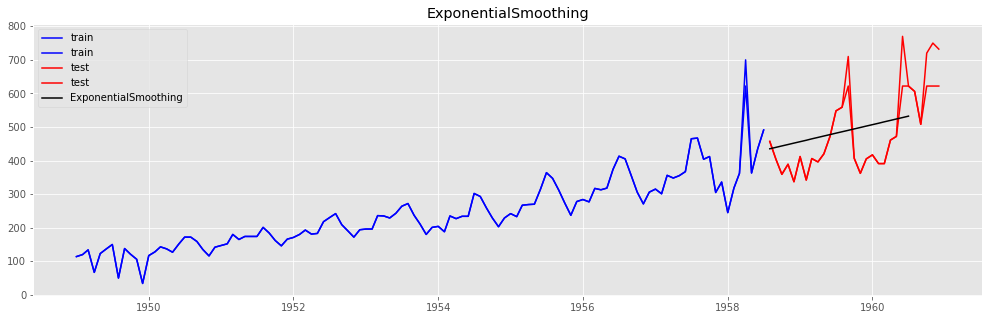

In [37]:
new_s=test.copy()
new_s['forcast']=model3_fit.forecast(24)
plt.figure(figsize=[17,5])
plt.plot(train, color='blue', label='train')
plt.plot(test, color='red',  label='test')
plt.plot(new_s['forcast'], color='black', label='ExponentialSmoothing')
plt.legend()
plt.title('ExponentialSmoothing')
plt.show()

In [38]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model4=ExponentialSmoothing(train['Customers_linear'],trend='additive',seasonal='mul', seasonal_periods=10)
model4_fit=model4.fit(smoothing_level=0.2, smoothing_slope=0.04)
model4_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': 0.04,
 'smoothing_seasonal': 0.21977347076374432,
 'damping_trend': nan,
 'initial_level': 211.11814955254752,
 'initial_trend': 1.8972815419321636,
 'initial_seasons': array([0.79326728, 0.88623063, 0.74681274, 0.64684216, 0.85920989,
        0.71066594, 0.72650714, 0.74815301, 0.76092587, 0.82058758]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

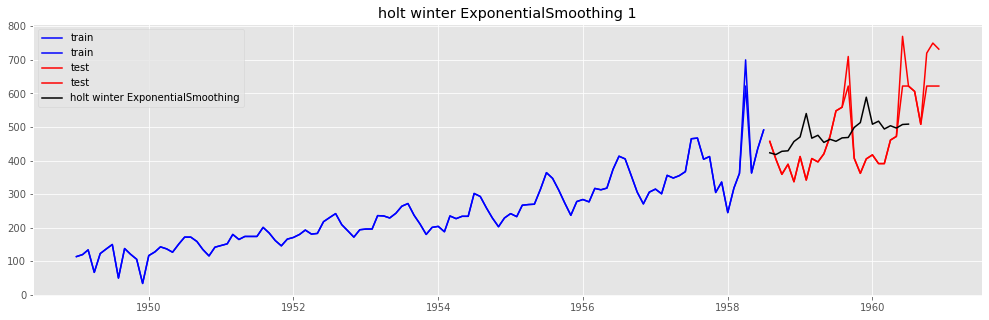

In [39]:
new_s=test.copy()
new_s['forcast']=model4_fit.forecast(24)
plt.figure(figsize=[17,5])
plt.plot(train, color='blue', label='train')
plt.plot(test, color='red',  label='test')
plt.plot(new_s['forcast'], color='black', label='holt winter ExponentialSmoothing')
plt.legend()
plt.title('holt winter ExponentialSmoothing 1')
plt.show()

In [40]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model5=ExponentialSmoothing(train['Customers_linear'],trend='mul',seasonal='mul', seasonal_periods=10)
model5_fit=model5.fit(smoothing_level=0.2, smoothing_slope=0.04)
model5_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': 0.04,
 'smoothing_seasonal': 0.2471239009654181,
 'damping_trend': nan,
 'initial_level': 232.31684022756454,
 'initial_trend': 1.0017611779943698,
 'initial_seasons': array([0.66939118, 0.71578002, 0.61671415, 0.52984351, 0.58345005,
        0.61028719, 0.62317215, 0.580832  , 0.64841175, 0.73481652]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

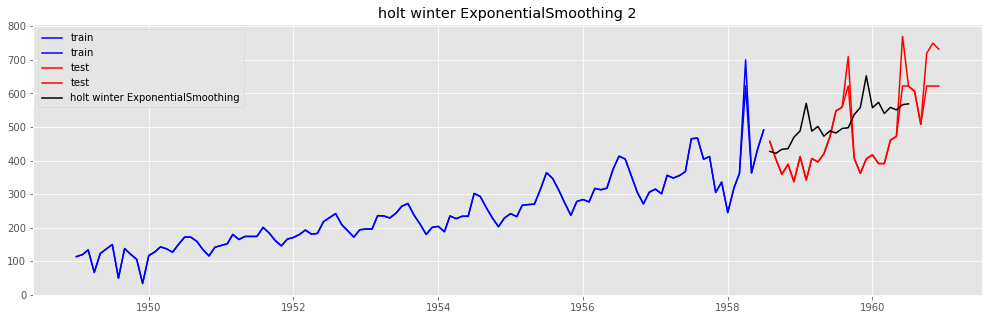

In [41]:
new_s=test.copy()
new_s['forcast']=model5_fit.forecast(24)
plt.figure(figsize=[17,5])
plt.plot(train, color='blue', label='train')
plt.plot(test, color='red',  label='test')
plt.plot(new_s['forcast'], color='black', label='holt winter ExponentialSmoothing')
plt.legend()
plt.title('holt winter ExponentialSmoothing 2')
plt.show()

In [42]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model6=ExponentialSmoothing(train['Customers_linear'],trend='multiplicative',seasonal='additive', seasonal_periods=12)
model6_fit=model6.fit(smoothing_level=0.2, smoothing_slope=0.04)
model6_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': 0.04,
 'smoothing_seasonal': 0.7766279069767443,
 'damping_trend': nan,
 'initial_level': 203.5,
 'initial_trend': 1.0229512213667744,
 'initial_seasons': array([ -89.5,  -83.5,  -69.5, -136.5,  -80.5,  -66.5,  -53.5, -153.5,
         -65.5,  -82.5,  -97.5, -169.5]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

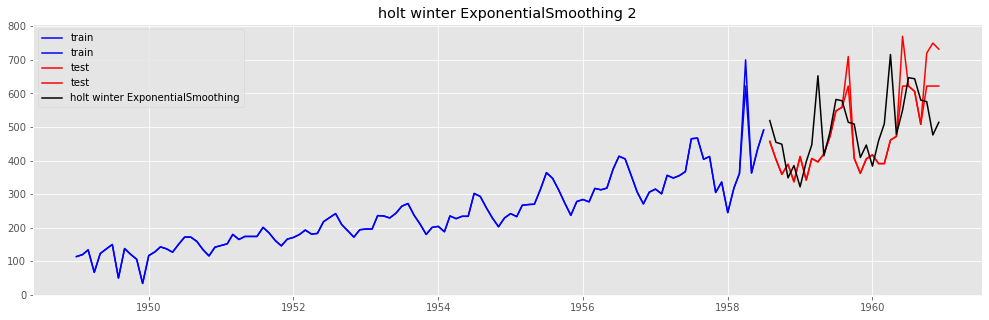

In [47]:
new_s2=test.copy()
new_s2['forcast']=model6_fit.forecast(36)
plt.figure(figsize=[17,5])
plt.plot(train, color='blue', label='train')
plt.plot(test, color='red',  label='test')
plt.plot(new_s2['forcast'], color='black', label='holt winter ExponentialSmoothing')
plt.legend()
plt.title('holt winter ExponentialSmoothing 2')
plt.show()

In [48]:
new_s2['forcast']

Date
1958-08-01    519.126711
1958-09-01    454.439146
1958-10-01    448.792010
1958-11-01    348.479475
1958-12-01    385.087082
1959-01-01    321.636396
1959-02-01    396.752079
1959-03-01    447.037464
1959-04-01    652.569904
1959-05-01    414.016970
1959-06-01    485.577574
1959-07-01    582.021516
1959-08-01    578.281930
1959-09-01    514.095709
1959-10-01    508.954166
1959-11-01    409.151509
1959-12-01    446.273314
1960-01-01    383.341185
1960-02-01    458.979819
1960-03-01    509.792589
1960-04-01    715.856881
1960-05-01    477.840309
1960-06-01    549.941819
1960-07-01    646.931251
1960-08-01    643.741780
1960-09-01    580.110334
1960-10-01    575.528269
1960-11-01    476.289831
1960-12-01    513.980638
Name: forcast, dtype: float64

### ADF test

<AxesSubplot:xlabel='Month'>

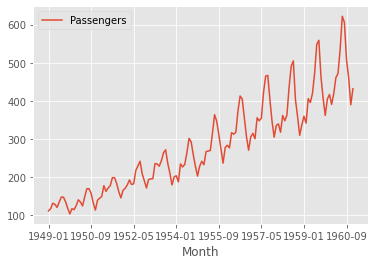

In [54]:
data1=pd.read_csv('airline-passengers.csv', header=0, index_col=0)
data1.plot()

<AxesSubplot:ylabel='Frequency'>

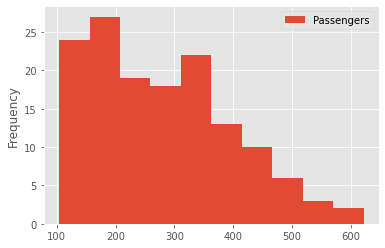

In [56]:
data1.plot(kind='hist')

<AxesSubplot:xlabel='Date'>

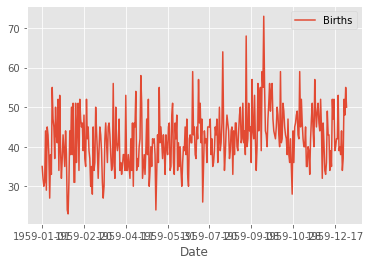

In [57]:
data1=pd.read_csv('daily-total-female-births.csv', header=0, index_col=0)
data1.plot()

In [71]:
import numpy as np
data1=pd.read_csv('daily-total-female-births.csv', header=0, index_col=0, squeeze= True)
num=round(len(data1)/2)
train=data1[:num]
test=data1[num:]
train_mean, test_mean=train.mean(), test.mean()
va1, var2=train.var(), test.var()
print('train-mean :{}, test-mean: {}'. format(train_mean, test_mean))
print('train-var :{}, test-var: {}'. format(va1, var2))

train-mean :39.76373626373626, test-mean: 44.185792349726775
train-var :49.48530751016939, test-var: 48.97628055005103


In [75]:
import numpy as np
data01=pd.read_csv('airline-passengers.csv', header=0, index_col=0, squeeze= True)
num1=round(len(data01)/2)
train1=data01[:num1]
test1=data01[num1:]
train1_mean, test1_mean=train1.mean(), test1.mean()
va11, var21=train1.var(), test1.var()
print('train-mean :{}, test-mean: {}'. format(train1_mean, test1_mean))
print('train-var :{}, test-var: {}'. format(va11, var21))

train-mean :182.90277777777777, test-mean: 377.69444444444446
train-var :2275.6946400625984, test-var: 7471.736306729265


In [76]:
new_data=np.log(data01)
num2=round(len(new_data)/2)
train2=new_data[:num2]
test2=new_data[num2:]
train2_mean, test2_mean=train2.mean(), test2.mean()
va12, var22=train2.var(), test2.var()
print('train-mean :{}, test-mean: {}'. format(train2_mean, test2_mean))
print('train-var :{}, test-var: {}'. format(va12, var22))

train-mean :5.175146140003772, test-mean: 5.909205777059973
train-var :0.06933788695311012, test-var: 0.049958055640272926


### test

In [88]:
data1=pd.read_csv('daily-total-female-births.csv', header=0, index_col=0, squeeze= True)
from statsmodels.tsa.stattools import adfuller
x1=data1.values
x1_t= adfuller(x1)
print('ADF statitics:{}'.format(x1_t[0]))
print('p_value:{}'.format(x1_t[1]))
print('critical value')
for key, value in x1_t[4].items():
    print("key:{}, value:{}".format(key, value))

ADF statitics:-4.808291253559759
p_value:5.243412990149989e-05
critical value
key:1%, value:-3.448748905151901
key:5%, value:-2.8696473721448728
key:10%, value:-2.5710891239349585


In [92]:
data01=pd.read_csv('airline-passengers.csv', header=0, index_col=0, squeeze= True)
x2=data01.values
x2_t=adfuller(x2)
print('adf statitics: {}'.format(x2_t[0]))
print('p-value', x2_t[1])
print('critical value')
for key , value in x2_t[4].items():
    print('{}, {}'.format(key , value ))

adf statitics: 0.8153688792060587
p-value 0.9918802434376411
critical value
1%, -3.4816817173418295
5%, -2.8840418343195267
10%, -2.578770059171598


In [93]:
log_x2=np.log(x2)
x2_t=adfuller(log_x2)
print('adf statitics: {}'.format(x2_t[0]))
print('p-value', x2_t[1])
print('critical value')
for key , value in x2_t[4].items():
    print('{}, {}'.format(key , value ))

adf statitics: -1.7170170891069545
p-value 0.42236677477039436
critical value
1%, -3.4816817173418295
5%, -2.8840418343195267
10%, -2.578770059171598


In [94]:
x2_t

(-1.7170170891069545,
 0.42236677477039436,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -445.3990312497209)

In [95]:
dir(x2_t)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']